In [1]:
import numpy as np
import matplotlib.pyplot as plt

[ 1.313  0.504 -0.958  0.317 -2.223  0.737 -0.994  0.866 -0.748 -0.255  0.019 -0.001  0.258 -2.228]


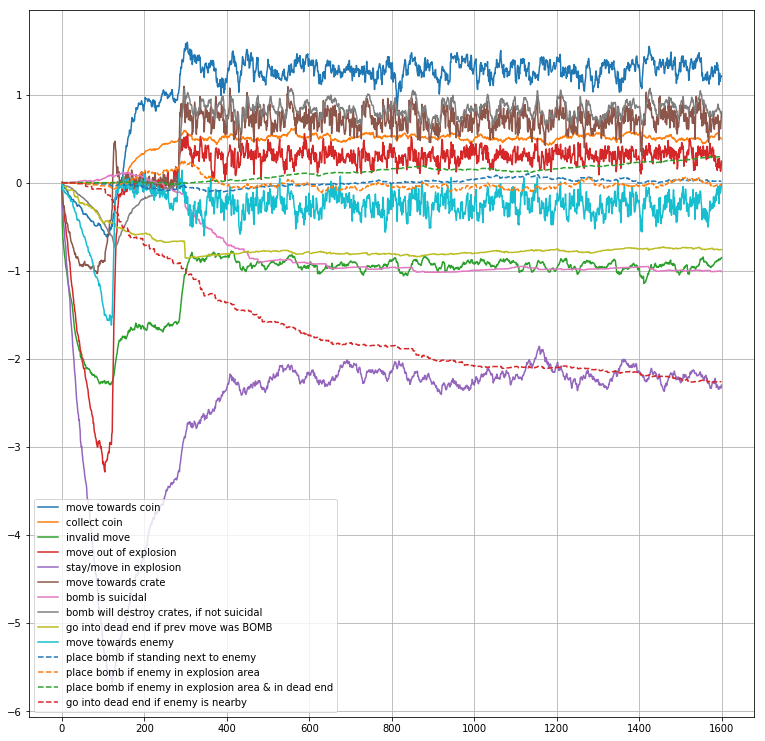

In [13]:
weights = np.load('weights_updates.npy')

feature_names = [
    'move towards coin',
    'collect coin',
    'invalid move',
    'move out of explosion',
    'stay/move in explosion',
    'move towards crate',
    'bomb is suicidal',
    'bomb will destroy crates, if not suicidal',
    'go into dead end if prev move was BOMB',
    'move towards enemy',
    'place bomb if standing next to enemy',
    'place bomb if enemy in explosion area',
    'place bomb if enemy in explosion area & in dead end',
    'go into dead end if enemy is nearby'
]
end = np.where(~weights[1:].any(axis=1))[0]
end = len(weights) if len(end) == 0 else end[0]
linestyles = ['-', '--']
plt.figure(figsize=(13,13))
for i in range(weights.shape[1]):
    plt.plot(np.arange(end), weights[:end,i], label=feature_names[i], linestyle=linestyles[i//10])
    
plt.legend(loc=3)
plt.grid()
with np.printoptions(precision=3, suppress=True, linewidth=200):
    print(np.mean(weights[1400:1600], axis=0))

780


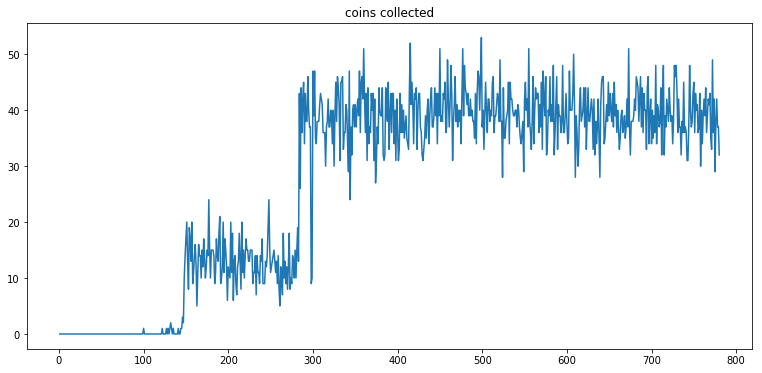

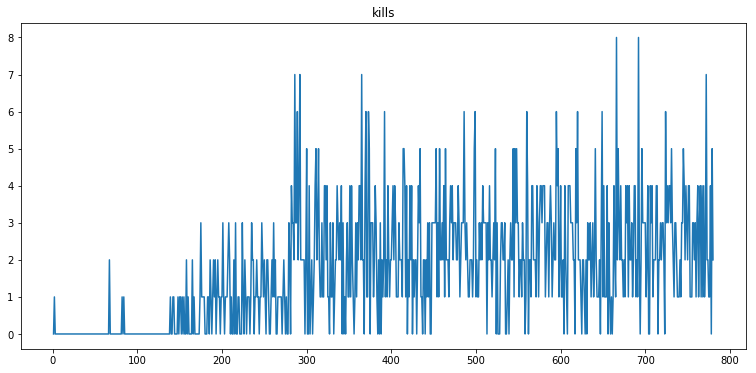

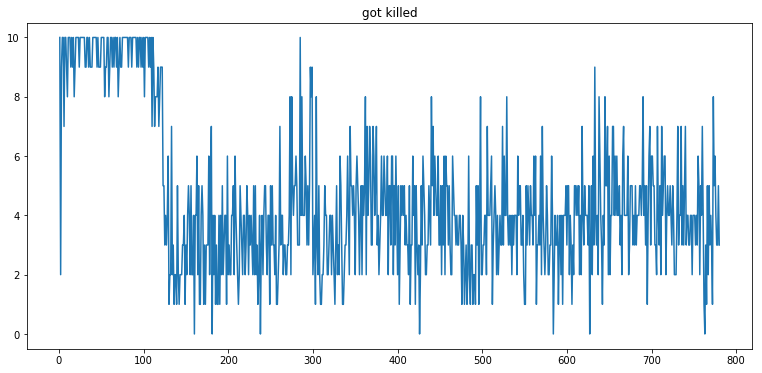

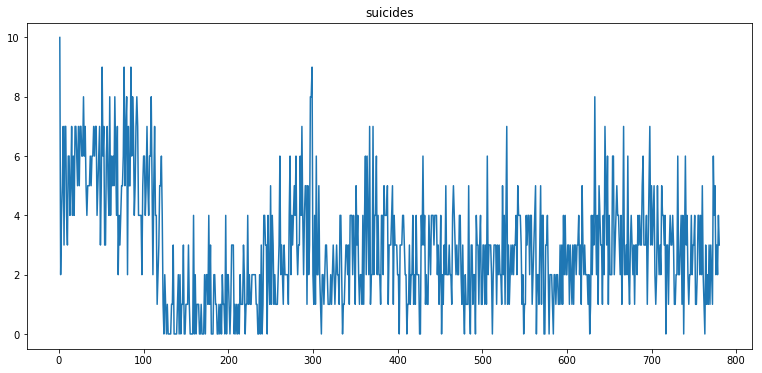

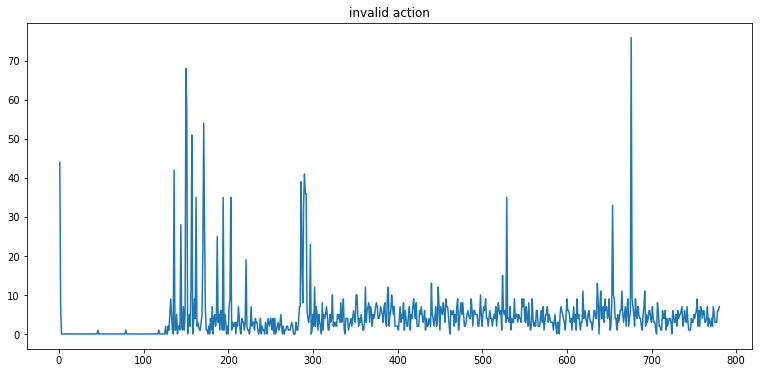

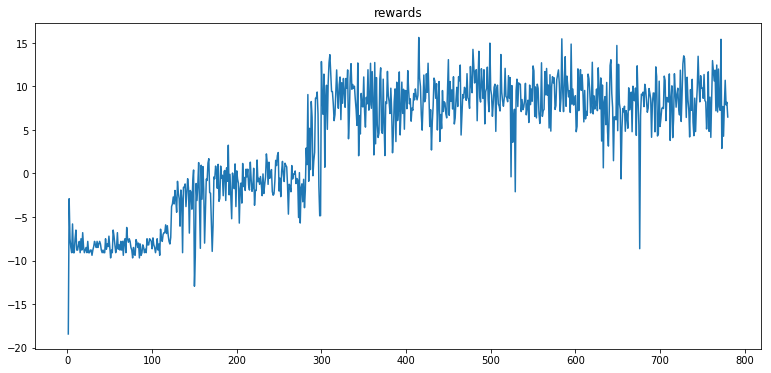

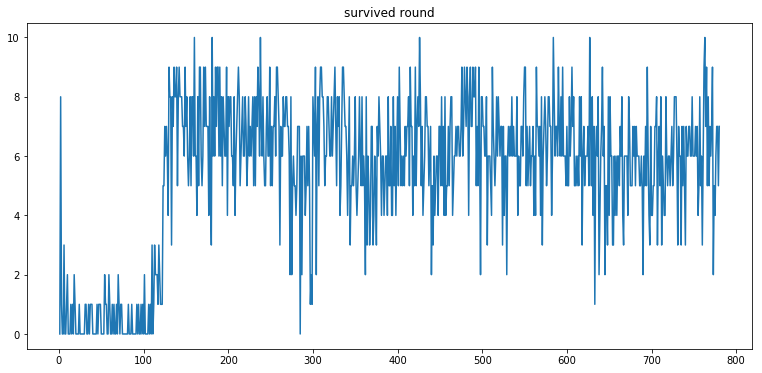

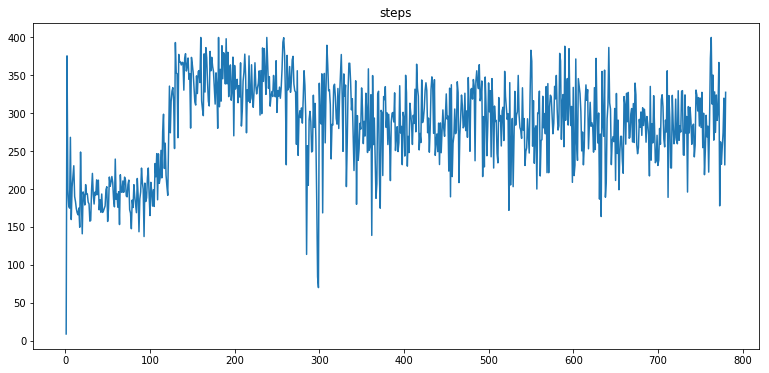

In [8]:
raw_data = np.load('evaluation_data.npy')

labels = [
    "coins collected",
    "kills",
    "got killed",
    "suicides",
    "invalid action",
    "rewards",
    "survived round",
    "steps",
]

if list(raw_data[-1,:,0]).count(0.) == 0:
    end = len(raw_data.shape[1])
else:
    end = list(raw_data[-1,:,0]).index(0.)
print(end)

raw_data = raw_data[:,:end,:]
data = np.zeros((len(labels), end))

data[0,:] = np.sum(raw_data[0,:,:], axis=1)
data[1,:] = np.sum(raw_data[1,:,:], axis=1)
data[2,:] = np.sum(raw_data[2,:,:], axis=1)
data[3,:] = np.sum(raw_data[3,:,:], axis=1)
data[4,:] = np.sum(raw_data[4,:,:], axis=1)
data[5,:] = np.mean(raw_data[5,:,:], axis=1)
data[6,:] = np.sum(raw_data[6,:,:], axis=1)
data[7,:] = np.mean(raw_data[7,:,:], axis=1)


for i in range(data.shape[0]):
    plt.figure(figsize=(13,6))
    plt.plot(np.arange(1, data.shape[1]+1), data[i])
    plt.title(labels[i])

In [15]:
training_data = np.load('training_data/observations_1.npy')
print(training_data.shape)

(4060, 1, 17, 17, 6)
